In [1]:
N = (13 + 4 ) % 5 + 1 
print (N);

3


Перші 8 рядків:
   Id       Name  Year Gender  Count
0   1       Mary  1880      F   7065
1   2       Anna  1880      F   2604
2   3       Emma  1880      F   2003
3   4  Elizabeth  1880      F   1939
4   5     Minnie  1880      F   1746
5   6   Margaret  1880      F   1578
6   7        Ida  1880      F   1472
7   8      Alice  1880      F   1414

Останні 8 рядків:
              Id     Name  Year Gender  Count
1825425  1825426       Zo  2014      M      5
1825426  1825427    Zyeir  2014      M      5
1825427  1825428     Zyel  2014      M      5
1825428  1825429   Zykeem  2014      M      5
1825429  1825430   Zymeer  2014      M      5
1825430  1825431  Zymiere  2014      M      5
1825431  1825432    Zyran  2014      M      5
1825432  1825433    Zyrin  2014      M      5

Загальна інформація про дані:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Name    ob

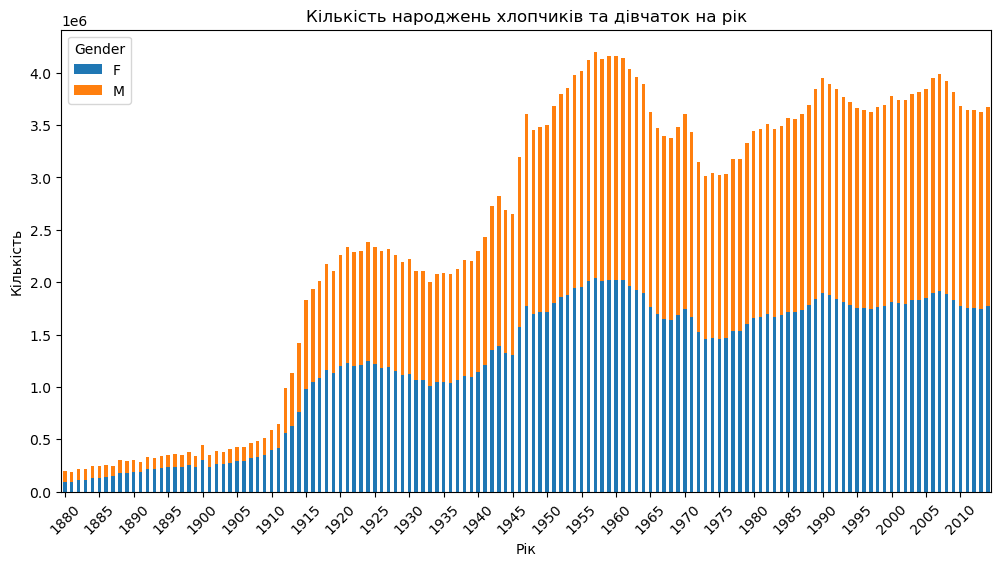


Кількість гендерно-нейтральних імен: 10221

Кількість хлопчиків, названих Barbara: 4139

Найпопулярніші гендерно-нейтральні імена:
Name
James      5129096
John       5106590
Robert     4816785
Michael    4330805
Mary       4130441
Name: Count, dtype: int64


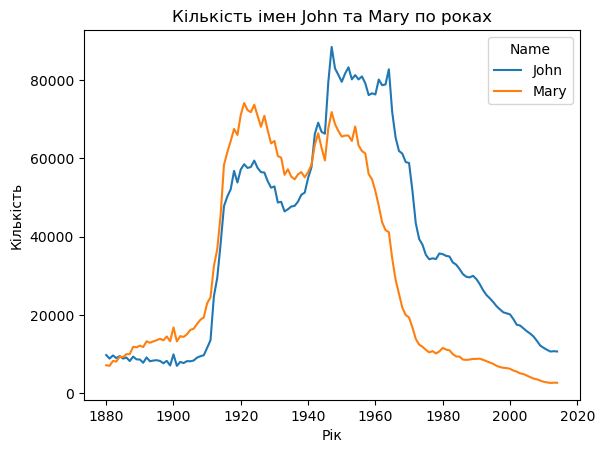


Найпопулярніші імена в кожному році:
         Year      Name  Count
942      1880      John   9655
2938     1881      John   8769
4963     1882      John   9557
7116     1883      John   8894
9318     1884      John   9388
...       ...       ...    ...
1657592  2010  Isabella  22883
1691633  2011    Sophia  21816
1725502  2012    Sophia  22267
1759186  2013    Sophia  21147
1792389  2014      Emma  20799

[135 rows x 3 columns]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('NationalNames.csv')

# 1. Виведення перших 8 рядків набору даних
first_8_rows = df.head(8)
print("Перші 8 рядків:")
print(first_8_rows)

# 2. Виведення останніх 8 рядків набору даних
last_8_rows = df.tail(8)
print("\nОстанні 8 рядків:")
print(last_8_rows)

# 4. Загальна інформація про дані
print("\nЗагальна інформація про дані:")
print(df.info())

# 5. Кількість унікальних імен
unique_names = df['Name'].nunique()
print("\nКількість унікальних імен:", unique_names)

# 6. Кількість унікальних жіночих і чоловічих імен
unique_male_names = df[df['Gender'] == 'M']['Name'].nunique()
unique_female_names = df[df['Gender'] == 'F']['Name'].nunique()
print("\nКількість унікальних чоловічих імен:", unique_male_names)
print("Кількість унікальних жіночих імен:", unique_female_names)

# 7. 5 найпопулярніших чоловічих імен у 2010 році
top_5_male_names_2010 = df[(df['Gender'] == 'M') & (df['Year'] == 2010)].groupby('Name')['Count'].sum().nlargest(5)
print("\n5 найпопулярніших чоловічих імен у 2010 році:")
print(top_5_male_names_2010)

# 8. Найпопулярніше ім'я за один рік
popular_name_year = df.loc[df.groupby('Year')['Count'].idxmax()][['Year', 'Name', 'Count']]
print("\nНайпопулярніше ім'я за рік:")
print(popular_name_year)

# 9. Кількість записів з мінімальним Count
min_count_records = df[df['Count'] == df['Count'].min()]
print("\nКількість записів з мінімальним Count:", len(min_count_records))

# 10. Кількість унікальних імен у кожному році
unique_names_per_year = df.groupby('Year')['Name'].nunique()
print("\nКількість унікальних імен у кожному році:")
print(unique_names_per_year)

# 11. Рік з найбільшою кількістю унікальних імен
year_most_unique_names = unique_names_per_year.idxmax()
print("\nРік з найбільшою кількістю унікальних імен:", year_most_unique_names)

# 12. Найпопулярніше ім'я у році з найбільшою кількістю унікальних імен
most_popular_name_in_year = df[df['Year'] == year_most_unique_names].groupby('Name')['Count'].sum().idxmax()
print("\nНайпопулярніше ім'я у році з найбільшою кількістю унікальних імен:", most_popular_name_in_year)

# 18. Кількість років, коли дівчаток народжувалось більше, ніж хлопчиків
gender_count_per_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
years_more_females = gender_count_per_year[gender_count_per_year['F'] > gender_count_per_year['M']].shape[0]
print(f"\nКількість років, коли народжувалося більше дівчаток: {years_more_females}")

# 19. Графік загальної кількості народжень хлопчиків та дівчаток на рік зі збільшеним кроком
gender_births_per_year = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()

# Побудова графіка
ax = gender_births_per_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Кількість народжень хлопчиків та дівчаток на рік')
plt.xlabel('Рік')
plt.ylabel('Кількість')

# Налаштування кроку міток на осі X
plt.xticks(ticks=range(0, len(gender_births_per_year), 5), labels=gender_births_per_year.index[::5], rotation=45)

plt.show()

# 20. Кількість гендерно-нейтральних імен
gender_neutral_names = df.groupby('Name')['Gender'].nunique()
neutral_names_count = (gender_neutral_names == 2).sum()
print("\nКількість гендерно-нейтральних імен:", neutral_names_count)

# 21. Кількість хлопчиків, названих Barbara
boys_named_barbara = df[(df['Gender'] == 'M') & (df['Name'] == 'Barbara')]['Count'].sum()
print("\nКількість хлопчиків, названих Barbara:", boys_named_barbara)

# 23. Найпопулярніші гендерно-нейтральні імена
popular_neutral_names = df[df['Name'].isin(gender_neutral_names[gender_neutral_names == 2].index)].groupby('Name')['Count'].sum().nlargest(5)
print("\nНайпопулярніші гендерно-нейтральні імена:")
print(popular_neutral_names)

# 25. Графіки кількості імен John та Mary по роках
john_mary_counts = df[df['Name'].isin(['John', 'Mary'])].groupby(['Year', 'Name'])['Count'].sum().unstack()
john_mary_counts.plot()
plt.title('Кількість імен John та Mary по роках')
plt.xlabel('Рік')
plt.ylabel('Кількість')
plt.show()

# 27. Найпопулярніші імена в кожному році
most_popular_names_per_year = df.loc[df.groupby('Year')['Count'].idxmax()][['Year', 'Name', 'Count']]
print("\nНайпопулярніші імена в кожному році:")
print(most_popular_names_per_year)
